In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
import random
from sympy import symbols, Eq, solve
import datetime

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 3829.45it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
city_sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x      geo_y
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161  52.296407
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974  52.295637
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126  52.298132
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129  52.306869
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618  52.311806
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398  52.318612
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656  52.323602
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454  52.329785
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606  52.331769
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539  52.337689
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963  52.339322
 11   8

In [20]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [21]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [22]:
city_sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x      geo_y
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161  52.296407
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974  52.295637
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126  52.298132
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129  52.306869
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618  52.311806
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398  52.318612
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656  52.323602
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454  52.329785
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606  52.331769
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539  52.337689
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963  52.339322
 11   8

In [23]:
city_sub_order_route_dict['Metro 50: Gein => Isolatorweg']

,id,name,geometry,geo_x,geo_y
0,5,Gein,POINT (4.9891612 52.2964067),4.989161,52.296407
1,18,Reigersbos,POINT (4.9740002 52.2956365),4.974,52.295637
2,17,Holendrecht,POINT (4.9601264 52.2981319),4.960126,52.298132
3,6,Bullewijk,POINT (4.9521292 52.306869),4.952129,52.306869
4,4,Bijlmer ArenA,POINT (4.9476178 52.311806),4.947618,52.311806
5,3,Strandvliet,POINT (4.9413977 52.3186119),4.941398,52.318612
6,16,Duivendrecht,POINT (4.9365601 52.3236024),4.93656,52.323602
7,7,Van der Madeweg,POINT (4.9304544 52.3297847),4.930454,52.329785
8,9,Overamstel,POINT (4.9176063 52.3317688),4.917606,52.331769
9,19,Station RAI,POINT (4.889539 52.337689),4.889539,52.337689


In [24]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [25]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [26]:
# city_sub_all_shortest_paths_id_dict

In [27]:
# city_sub_edges

In [28]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [29]:
city_sub_ordered_edges

,from_id,to_id,osm_id,geometry,railway,service,id,distance,time,weights,from_to,to_from
0,1,0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,258.660599,0.010346,258,"(1, 0)","(0, 1)"
1,2,3,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,4,5,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,7,6,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,28.046592,0.001122,28,"(7, 6)","(6, 7)"
4,492,8,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,382.935219,0.015317,382,"(492, 8)","(8, 492)"
...,...,...,...,...,...,...,...,...,...,...,...,...
935,803,463,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,73.656989,0.002946,73,"(803, 463)","(463, 803)"
936,462,803,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,9.568427,0.000383,9,"(462, 803)","(803, 462)"
937,246,804,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,9.568874,0.000383,9,"(246, 804)","(804, 246)"
938,804,463,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,73.789113,0.002952,73,"(804, 463)","(463, 804)"


In [30]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [31]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

In [32]:
city_sub_shortest_path_pairs_dict

{'Metro 50: Gein => Isolatorweg':      from_id  to_id     osm_id  \
 358      634    317  166187911   
 359      318    634  166187911   
 361      321    318  166187913   
 366      654    321  166187917   
 367      328    654  166187917   
 ..       ...    ...        ...   
 424      491    373  166370272   
 426      374    498  166370274   
 427      498     79  166370274   
 428      373    374  166370275   
 429      121    372  166370277   
 
                                               geometry railway service   id  \
 358  LINESTRING (4.9823107 52.2963387, 4.9838859 52...  subway    None  358   
 359  LINESTRING (4.9838859 52.2963361, 4.9847396 52...  subway    None  359   
 361  LINESTRING (4.9847396 52.2963405, 4.9850507 52...  subway    None  361   
 366  LINESTRING (4.9850507 52.2963421, 4.9856334 52...  subway    None  366   
 367  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway    None  367   
 ..                                                 ...     ...  

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [33]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [34]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [35]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [36]:
city_sub_extended_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
936,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
937,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
938,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


### Organize edges dataframe for baseline network--city_sub_new_edges

In [37]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [38]:
# city_sub_shortest_path_edges_df

In [39]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [40]:
city_sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(463, 803)","(803, 463)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
632,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(803, 462)","(462, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
633,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,246,804,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
634,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,804,463,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [41]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [42]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [43]:
# city_sub_shortest_path_nodes_id

In [44]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [45]:
city_sub_new_nodes

,id,geometry,degree
0,1,POINT (4.9232197 52.3339159),2
1,2,POINT (4.9642294 52.2945339),2
2,4,POINT (4.9622901 52.2955678),2
3,7,POINT (4.8471439 52.3952143),2
4,492,POINT (4.8457805 52.395217),3
...,...,...,...
633,805,POINT (4.8505958 52.3951031),2
634,323,POINT (4.989299 52.2962711),2
635,180,POINT (4.8772326 52.3393181),3
636,728,POINT (4.9010471 52.3775081),2


### Add columns to stations--city_sub_new_staions

In [46]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [47]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [48]:
city_sub_new_stations

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,328,POINT (4.98916 52.29641),2,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,855,POINT (4.97400 52.29564),2,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,854,POINT (4.96013 52.29813),2,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,810,POINT (4.95213 52.30687),2,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,809,POINT (4.94762 52.31181),2,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
82,824,POINT (4.96734 52.32837),2,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,823,POINT (4.95669 52.33041),2,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,829,POINT (4.94628 52.32683),2,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
85,827,POINT (4.93028 52.32974),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


## Create virtual edges at connection stations on single network 

#### Select nodes where need to build virtual edges based on name

In [49]:
connect_stations_name_metro,connect_stations_dataframe_metro = select_connect_stations_one_network(city_sub_new_stations)

In [50]:
connect_stations_name_metro

['Centraal Station', 'Spaklerweg', 'Van der Madeweg', 'Zuid']

In [51]:
connect_stations_dataframe_metro

,id,geometry,degree,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
57,816,POINT (4.90088 52.37921),2,Centraal Station,4.900879,52.379208,"(4.9008785, 52.3792082)",Metro 52: Noord => Zuid,subway,"51, 52, 53, 54","51, 52, 53, 54"
54,728,POINT (4.90105 52.37751),2,Centraal Station,4.901047,52.377508,"(4.9010471, 52.3775081)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 52, 53, 54","51, 52, 53, 54"
68,815,POINT (4.90094 52.37919),2,Centraal Station,4.900937,52.379188,"(4.9009371, 52.3791884)",Metro 52: Zuid => Noord,subway,"51, 52, 53, 54","51, 52, 53, 54"
40,731,POINT (4.90087 52.37735),2,Centraal Station,4.900869,52.377355,"(4.9008686, 52.3773546)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 52, 53, 54","51, 52, 53, 54"
48,832,POINT (4.92085 52.34025),2,Spaklerweg,4.920853,52.340246,"(4.9208526, 52.3402457)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54","51, 53, 54"
71,830,POINT (4.92061 52.34019),2,Spaklerweg,4.920614,52.340191,"(4.9206141, 52.3401909)",Metro 53: Centraal Station => Gaasperplas,subway,"51, 53, 54","51, 53, 54"
46,831,POINT (4.92080 52.34023),2,Spaklerweg,4.920800,52.340235,"(4.9208004, 52.3402348)",Metro 51: Centraal Station => Isolatorweg,subway,"51, 53, 54","51, 53, 54"
86,833,POINT (4.92105 52.34029),2,Spaklerweg,4.921045,52.340287,"(4.9210454, 52.3402871)",Metro 53: Gaasperplas => Centraal Station,subway,"51, 53, 54","51, 53, 54"
72,826,POINT (4.93024 52.32972),2,Van der Madeweg,4.930239,52.329717,"(4.9302391, 52.3297174)",Metro 53: Centraal Station => Gaasperplas,subway,"50, 53, 54","50, 53, 54"
85,827,POINT (4.93028 52.32974),2,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


### Build connection edges

In [52]:
city_sub_connected_edges, city_sub_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_metro,city_sub_new_stations,id_edges_length_sub,city_sub_new_edges)

In [53]:
city_sub_connected_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,1,0,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(3, 2)","(2, 3)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(5, 4)","(4, 5)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,7,6,28.046592,0.001122,28,"(6, 7)","(7, 6)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,492,8,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,NaN,"LINESTRING (4.8772326 52.3393181, 4.8739781 52...",NaN,NaN,1005,180,83,365.940055,0.144415,1111,"(83, 180)","(180, 83)",NaN,NaN,NaN,NaN
680,NaN,"LINESTRING (4.8772326 52.3393181, 4.8780248 52...",NaN,NaN,1006,180,345,88.233092,0.144415,1111,"(345, 180)","(180, 345)",NaN,NaN,NaN,NaN
681,NaN,"LINESTRING (4.8780248 52.3393025, 4.8739633 52...",NaN,NaN,1007,345,840,452.138504,0.144415,1111,"(840, 345)","(345, 840)",NaN,NaN,NaN,NaN
682,NaN,"LINESTRING (4.8780248 52.3393025, 4.8739781 52...",NaN,NaN,1008,345,83,453.103438,0.144415,1111,"(83, 345)","(345, 83)",NaN,NaN,NaN,NaN


# Tram-Amsterdam

## Generate Baseline Networks

In [67]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 3730.54it/s]


Calculate_degree possibly unhappy


In [68]:
# city_tram_stations

In [69]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [70]:
id_nodes_length_tram

1920

In [71]:
id_edges_length_tram 

2204

In [72]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [73]:
# city_tram_edges

In [74]:
# city_tram_nodes

In [75]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_connected_edges_length_sub = city_sub_connected_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_connected_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [76]:
gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time','weights']]).to_file('city_tram_edges0502.GPKG',driver='GPKG')

In [77]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [78]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)
city_tram_edges = city_tram_edges.reset_index(drop = True)

In [79]:
# city_tram_edges

In [80]:
# city_tram_nodes

In [81]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [82]:
# city_tram_stations

In [83]:
# city_tram_routes

In [84]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [85]:
# city_tram_order_id_pairs

In [86]:
# city_tram_all_shortest_paths_id_dict

In [87]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [88]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [89]:
# duplicated_rows

In [90]:
len(duplicated_rows)

24

In [91]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [92]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [93]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [94]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [95]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [96]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [97]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [98]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [99]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [100]:
# city_tram_shortest_path_edges_df

In [101]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [102]:
# city_tram_new_edges

In [103]:
gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_new_edges0506.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [104]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [105]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [106]:
# city_tram_shortest_path_nodes_id

In [107]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [108]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [109]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [110]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [111]:
# city_tram_new_stations

## Create virtual edges at connection stations on single tram network 

#### Select nodes where need to build virtual edges based on name

In [112]:
connect_stations_name_tram,connect_stations_dataframe_tram = select_connect_stations_one_network(city_tram_new_stations)

In [113]:
connect_stations_name_tram

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [114]:
# len(connect_stations_name_tram)

In [115]:
# connect_stations_dataframe_tram

### Build connection edges

In [116]:
id_new_edges_length_tram = city_tram_new_edges['id'].iloc[-1] + 1

In [138]:
id_new_edges_length_tram

3169

In [118]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_tram,city_tram_new_stations,id_new_edges_length_tram,city_tram_new_edges)

In [139]:
city_tram_connected_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
2,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
3,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
4,7045994,"LINESTRING (4.9152768 52.3652225, 4.915065 52....",tram,None,1015,2598,877,250.873163,0.017920,250,"(877, 2598)","(2598, 877)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,NaN,"LINESTRING (4.9005615 52.3444211, 4.9003351 52...",NaN,NaN,3292,2435,2453,437.333225,0.218126,1654,"(2453, 2435)","(2435, 2453)",NaN,NaN,NaN,NaN
1623,NaN,"LINESTRING (4.9005615 52.3444211, 4.9011051 52...",NaN,NaN,3293,2435,2434,73.869611,0.218126,1654,"(2434, 2435)","(2435, 2434)",NaN,NaN,NaN,NaN
1624,NaN,"LINESTRING (4.9011051 52.3446536, 4.8997164 52...",NaN,NaN,3294,2434,2454,380.749836,0.218126,1654,"(2454, 2434)","(2434, 2454)",NaN,NaN,NaN,NaN
1625,NaN,"LINESTRING (4.9011051 52.3446536, 4.9003351 52...",NaN,NaN,3295,2434,2453,403.451221,0.218126,1654,"(2453, 2434)","(2434, 2453)",NaN,NaN,NaN,NaN


In [140]:
city_tram_connect_edges_dfs

{'Alexanderplein':     from_id  to_id       from_to       to_from  \
 0      2597   2366  (2597, 2366)  (2366, 2597)   
 1      2597   2465  (2597, 2465)  (2465, 2597)   
 2      2597   2671  (2597, 2671)  (2671, 2597)   
 3      2366   2597  (2366, 2597)  (2597, 2366)   
 4      2366   2465  (2366, 2465)  (2465, 2366)   
 5      2366   2671  (2366, 2671)  (2671, 2366)   
 6      2465   2597  (2465, 2597)  (2597, 2465)   
 7      2465   2366  (2465, 2366)  (2366, 2465)   
 8      2465   2671  (2465, 2671)  (2671, 2465)   
 9      2671   2597  (2671, 2597)  (2597, 2671)   
 10     2671   2366  (2671, 2366)  (2366, 2671)   
 11     2671   2465  (2671, 2465)  (2465, 2671)   
 
                                              geometry    distance    id  \
 0   LINESTRING (4.9196097 52.3634343, 4.9193627 52...   30.312744  3169   
 1   LINESTRING (4.9196097 52.3634343, 4.9192366 52...   90.196585  3170   
 2   LINESTRING (4.9196097 52.3634343, 4.9185684 52...  116.493550  3171   
 3   LINESTRI

In [119]:
len(city_tram_connect_edges_dfs)

16

In [120]:
# city_tram_connected_edges

In [121]:
# city_tram_connect_edges_dfs

In [122]:
# city_tram_connected_edges[city_tram_connected_edges['id'] == 3169]

In [123]:
# gpd.GeoDataFrame(city_tram_connected_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_connected_edges20240504.gpkg',driver = 'GPKG')

# Build network with straight lines

In [54]:
def new_stations_straight_line_df(city_sub_new_stations):
    city_sub_new_stations_straight_line_df = city_sub_new_stations[['id','geometry','name','geo_x','geo_y','coordinate_value','route_name_list','ref','transfer','route']]
    return city_sub_new_stations_straight_line_df

In [55]:
def new_order_route_dict(city_sub_order_route_dict,city_sub_new_stations_straight_line_df):
    
    city_sub_new_order_route_dict = {}
    for key,df in city_sub_order_route_dict.items():
        new_df = df[['geometry']]
        new_df = pd.merge(new_df,city_sub_new_stations_straight_line_df,on='geometry',how='left')
        city_sub_new_order_route_dict[key] = new_df

    return city_sub_new_order_route_dict

In [56]:
def new_edges_straight_line_df(city_sub_new_order_route_dict, average_speed):
    city_sub_new_edges_straight_line_df = pd.DataFrame()
    for route_name,stations_df in city_sub_new_order_route_dict.items():
        city_sub_new_edges_dict = {}

        for i in range(len(stations_df) - 1):
            from_station = stations_df.iloc[i]
            to_station = stations_df.iloc[i + 1]
    
            from_id = from_station['id']
            to_id = to_station['id']
            geometry = LineString([from_station['geometry'], to_station['geometry']])
            route_name_list = from_station['route_name_list']
            distance = LineString([from_station['geometry'], to_station['geometry']]).length
            travel_time = distance/average_speed
    
            edge_key = f"{i}"
            city_sub_new_edges_dict[edge_key] = {
                'geometry': geometry,
                'from_id': from_id,
                'to_id': to_id,
                'route_name_list': route_name_list,
                'distance': distance,
                'time': travel_time
                 }
            city_sub_new_edges_each_line_df = pd.DataFrame(city_sub_new_edges_dict).T
            
        city_sub_new_edges_straight_line_df = pd.concat([city_sub_new_edges_straight_line_df,city_sub_new_edges_each_line_df])
    return city_sub_new_edges_straight_line_df

## Metro network

In [57]:
city_sub_new_stations_straight_line_df = new_stations_straight_line_df(city_sub_new_stations)
city_sub_new_order_route_dict = new_order_route_dict(city_sub_order_route_dict,city_sub_new_stations_straight_line_df)
city_sub_new_edges_straight_line_df = new_edges_straight_line_df(city_sub_new_order_route_dict,)

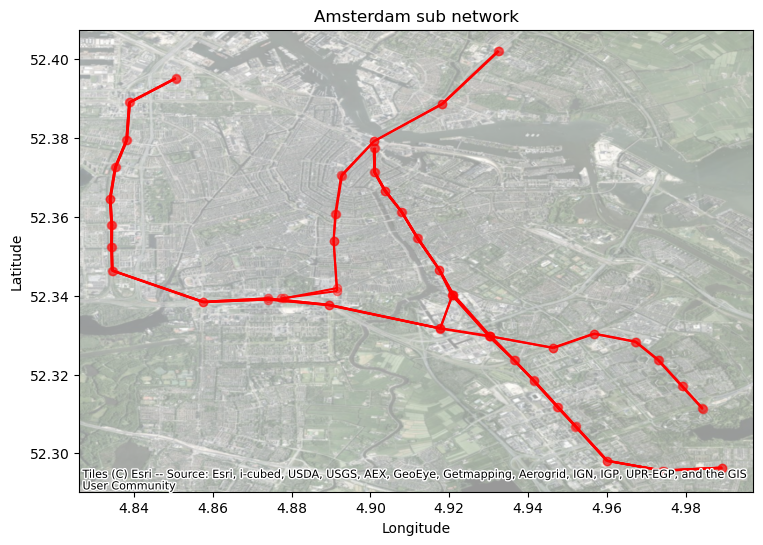

In [135]:
import contextily as ctx
city_sub_new_stations_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_stations_straight_line_df.copy(), geometry='geometry')
city_sub_new_edges_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_edges_straight_line_df.copy(), geometry='geometry')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_sub_new_stations_straight_line_gdf.plot(color='red', alpha=0.4, ax=ax, legend=True)
city_sub_new_edges_straight_line_gdf.plot(color='red', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam metro straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

## Tram network

In [124]:
city_tram_new_stations_straight_line_df = new_stations_straight_line_df(city_tram_new_stations)
city_tram_new_order_route_dict = new_order_route_dict(city_tram_order_route_dict,city_tram_new_stations_straight_line_df)
city_tram_new_edges_straight_line_df = new_edges_straight_line_df(city_tram_new_order_route_dict)

In [125]:
city_tram_new_stations_straight_line_df

,id,geometry,name,geo_x,geo_y,coordinate_value,route_name_list,ref,transfer,route
0,2209,POINT (4.93261 52.36080),Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
1,2371,POINT (4.92894 52.36093),Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
2,2474,POINT (4.92570 52.36012),Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
3,2480,POINT (4.91674 52.35907),Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 3","1, 3",tram
4,2466,POINT (4.91359 52.36235),Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,"1, 19, 7","1, 19, 7",tram
...,...,...,...,...,...,...,...,...,...,...
413,2427,POINT (4.92630 52.36814),Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,None,tram
414,2676,POINT (4.92960 52.37020),Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,None,tram
415,2383,POINT (4.93483 52.37301),Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,"26, 7","26, 7",tram
416,2619,POINT (4.93817 52.37346),C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,7,None,tram


In [126]:
city_tram_new_edges_straight_line_df

,geometry,from_id,to_id,route_name_list
0,"LINESTRING (4.9326128 52.3607965, 4.9289422 52...",2209,2371,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...
1,"LINESTRING (4.9289422 52.3609314, 4.9257029 52...",2371,2474,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...
2,"LINESTRING (4.9257029 52.3601162, 4.9167422 52...",2474,2480,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...
3,"LINESTRING (4.9167422 52.3590732, 4.9135923 52...",2480,2466,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...
4,"LINESTRING (4.9135923 52.3623479, 4.9071213 52...",2466,2448,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...
...,...,...,...,...
22,"LINESTRING (4.9248123 52.3668676, 4.9263002 52...",2442,2427,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...
23,"LINESTRING (4.9263002 52.3681426, 4.9295997 52...",2427,2676,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...
24,"LINESTRING (4.9295997 52.3701978, 4.9348327 52...",2676,2383,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...
25,"LINESTRING (4.9348327 52.3730107, 4.9381702 52...",2383,2619,Tram 7: Amsterdam Slotermeer => Amsterdam Azar...


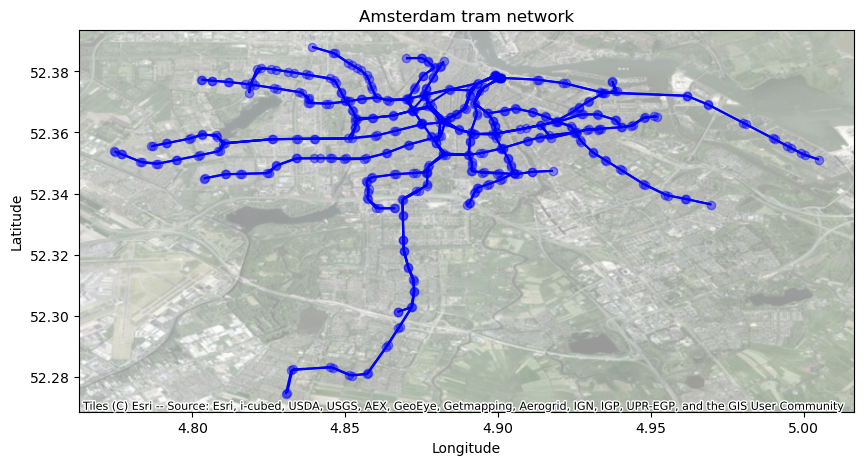

In [127]:
import contextily as ctx
city_tram_new_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_stations_straight_line_df.copy(), geometry='geometry')
city_tram_new_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_edges_straight_line_df.copy(), geometry='geometry')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_tram_new_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
city_tram_new_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam tram straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

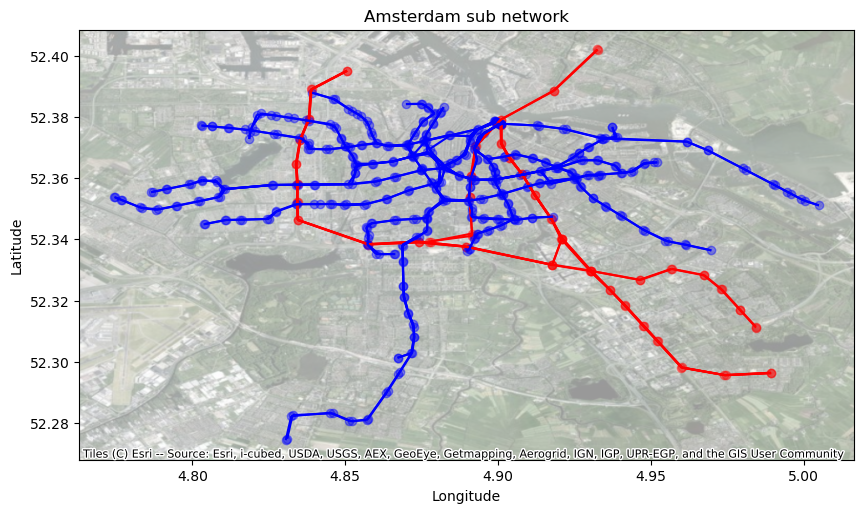

In [136]:
import contextily as ctx
city_sub_new_stations_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_stations_straight_line_df.copy(), geometry='geometry')
city_sub_new_edges_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_edges_straight_line_df.copy(), geometry='geometry')
city_tram_new_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_stations_straight_line_df.copy(), geometry='geometry')
city_tram_new_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_edges_straight_line_df.copy(), geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_sub_new_stations_straight_line_gdf.plot(color='red', alpha=0.4, ax=ax, legend=True)
city_sub_new_edges_straight_line_gdf.plot(color='red', ax=ax, legend=True)
city_tram_new_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
city_tram_new_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam metro and tram straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

In [137]:
city_sub_new_stations_straight_line_gdf[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']].to_file('city_sub_new_stations_straight_line_gdf0610.GPKG',driver='GPKG')
city_sub_new_edges_straight_line_gdf[['geometry','route_name_list']].to_file('city_sub_new_edges_straight_line_gdf0610.GPKG',driver='GPKG')

In [133]:
city_tram_new_stations_straight_line_gdf[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']].to_file('city_tram_new_stations_straight_line_gdf0610.GPKG',driver='GPKG')
city_tram_new_edges_straight_line_gdf[['geometry','route_name_list']].to_file('city_tram_new_edges_straight_line_gdf0610.GPKG',driver='GPKG')

## Connecting edges

In [155]:
connecting_stations_name_list = list(city_sub_new_stations_straight_line_df['name'].drop_duplicates())

In [156]:
connecting_stations_name_list

['Gein',
 'Reigersbos',
 'Holendrecht',
 'Bullewijk',
 'Bijlmer ArenA',
 'Strandvliet',
 'Duivendrecht',
 'Van der Madeweg',
 'Overamstel',
 'Station RAI',
 'Zuid',
 'Amstelveenseweg',
 'Henk Sneevlietweg',
 'Heemstedestraat',
 'Lelylaan',
 'Postjesweg',
 'Jan van Galenstraat',
 'De Vlugtlaan',
 'Station Sloterdijk',
 'Isolatorweg',
 'Centraal Station',
 'Nieuwmarkt',
 'Waterlooplein',
 'Weesperplein',
 'Wibautstraat',
 'Amstelstation',
 'Spaklerweg',
 'Noord',
 'Noorderpark',
 'Rokin',
 'Vijzelgracht',
 'De Pijp',
 'Europaplein',
 'Venserpolder',
 'Station Diemen Zuid',
 'Verrijn Stuartweg',
 'Ganzenhoef',
 'Kraaiennest',
 'Gaasperplas']

In [157]:
id_new_edges_length = city_tram_connected_edges['id'].iloc[-1] + 1
id_new_edges_length

3297

In [ ]:
def create_connect_edges_one_network_straight_line(connect_stations, id_edges_length_sub, city_sub_new_edges):
    """
    Create connecting edges between stations in a network.

    Parameters:
        connect_stations (DataFrame): A DataFrame containing information about connecting stations.
        id_edges_length_sub (int): The starting ID number for the connecting edges.
        city_sub_new_edges (DataFrame): A DataFrame containing information about existing edges in the network.

    Returns:
        connect_edges (DataFrame): A DataFrame containing information about the connecting edges.

    Example:
        connect_stations = pd.DataFrame({
            'id': [1, 2, 3],
            'coordinate_value': [(10, 20), (15, 25), (20, 30)]
        })
        id_edges_length_sub = 100  # starting ID number for connecting edges
        city_sub_new_edges = pd.DataFrame(...)  # DataFrame containing existing edges in the network

        connect_edges = create_connect_edges_one_network(connect_stations, id_edges_length_sub, city_sub_new_edges)

    Explanation:
        - This function creates connecting edges between stations in a network.
        - It generates all possible pairs of stations from the connect_stations DataFrame.
        - For each pair of stations, it creates a LineString representing the edge between them.
        - The information about these connecting edges is stored in the connect_edges DataFrame.
        - Each connecting edge is assigned a unique ID number starting from id_edges_length_sub.
        - The weights and time attributes of the connecting edges are set to values higher than the maximum values in the city_sub_new_edges DataFrame.
        - Finally, the connect_edges DataFrame containing information about the connecting edges is returned.
    """
    # Extract IDs of connecting stations
    id_list = list(connect_stations['id'])
    # Generate all possible pairs of station IDs
    id_pairs_list = list(permutations(id_list, 2))

    # Extract coordinates of connecting stations
    connect_station_coordinate_list = list(connect_stations['coordinate_value'])
    # Create LineString segments for connecting edges
    line_segments = [LineString(pair) for pair in permutations(connect_station_coordinate_list, 2)]
    
    connect_stations = gpd.GeoDataFrame(connect_stations, geometry='geometry', crs='EPSG:4326')
    # Define the coordinate reference systems (CRS)
    crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
    crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

    # Create a transformer to convert from degrees to meters
    transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

    # Apply the transformer to each Point in the 'geometry' column
    connect_stations['geometry_3857'] = connect_stations['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
    connect_stations_geometry_list = list(connect_stations['geometry_3857'])
    distance_list = [LineString(pair).length for pair in permutations(connect_stations_geometry_list, 2)]
    

    # Create a DataFrame to store information about connecting edges
    connect_edges = pd.DataFrame({
        'from_id': [pair[0] for pair in id_pairs_list],
        'to_id': [pair[1] for pair in id_pairs_list],
        'from_to': id_pairs_list,
        'to_from': [(pair[1], pair[0]) for pair in id_pairs_list],
        'geometry': line_segments,
        'distance': distance_list
    })

    # Assign unique IDs to connecting edges
    connect_edges_id_list = [id_edges_length_sub] + [i for i in range(id_edges_length_sub + 1, id_edges_length_sub + len(connect_edges))]
    connect_edges['id'] = connect_edges_id_list
    
    # Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
    connect_edges['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + 1
    # Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
    connect_edges['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + 0.1
    connect_edges = connect_edges[connect_edges['distance'] <= 500 ]
   
    # Return the DataFrame containing information about the connecting edges
    return connect_edges

In [158]:
city_sub_new_connected_edges_straight_line, city_new_sub_connect_edges_dfs_straight_line = connected_all_edges_dataframe(connecting_stations_name_list,city_sub_new_stations_straight_line_df,id_new_edges_length,city_sub_new_edges_straight_line_df)

KeyError: 'weights'

In [159]:
city_sub_new_connected_edges_straight_line

NameError: name 'city_sub_new_connected_edges_straight_line' is not defined

#### Select nodes where need to build virtual edges based on name

In [112]:
connect_stations_name_tram,connect_stations_dataframe_tram = select_connect_stations_one_network(city_tram_new_stations)

In [113]:
connect_stations_name_tram

['Alexanderplein',
 'Amstelveenseweg',
 'Baden Powellweg',
 'Bilderdijkstraat',
 'Frederiksplein',
 'Hoekenes',
 'Johan Huizingalaan',
 'Keizersgracht',
 'Leidseplein',
 'Maasstraat',
 'Mercatorplein',
 'Prinsengracht',
 'Rietlandpark',
 'Victorieplein',
 'Vijzelgracht',
 'Waalstraat']

In [114]:
# len(connect_stations_name_tram)

In [115]:
# connect_stations_dataframe_tram

### Build connection edges

In [116]:
id_new_edges_length_tram = city_tram_new_edges['id'].iloc[-1] + 1

In [138]:
id_new_edges_length_tram

3169

In [118]:
city_tram_connected_edges, city_tram_connect_edges_dfs = connected_all_edges_dataframe(connect_stations_name_tram,city_tram_new_stations,id_new_edges_length_tram,city_tram_new_edges)

In [139]:
city_tram_connected_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,1010,868,869,28.561299,0.002040,28,"(869, 868)","(868, 869)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,1012,872,873,390.987463,0.027928,390,"(873, 872)","(872, 873)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
2,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,1013,874,875,345.247175,0.024661,345,"(875, 874)","(874, 875)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
3,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,1014,876,2598,35.152166,0.002511,35,"(2598, 876)","(876, 2598)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
4,7045994,"LINESTRING (4.9152768 52.3652225, 4.915065 52....",tram,None,1015,2598,877,250.873163,0.017920,250,"(877, 2598)","(2598, 877)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,NaN,"LINESTRING (4.9005615 52.3444211, 4.9003351 52...",NaN,NaN,3292,2435,2453,437.333225,0.218126,1654,"(2453, 2435)","(2435, 2453)",NaN,NaN,NaN,NaN
1623,NaN,"LINESTRING (4.9005615 52.3444211, 4.9011051 52...",NaN,NaN,3293,2435,2434,73.869611,0.218126,1654,"(2434, 2435)","(2435, 2434)",NaN,NaN,NaN,NaN
1624,NaN,"LINESTRING (4.9011051 52.3446536, 4.8997164 52...",NaN,NaN,3294,2434,2454,380.749836,0.218126,1654,"(2454, 2434)","(2434, 2454)",NaN,NaN,NaN,NaN
1625,NaN,"LINESTRING (4.9011051 52.3446536, 4.9003351 52...",NaN,NaN,3295,2434,2453,403.451221,0.218126,1654,"(2453, 2434)","(2434, 2453)",NaN,NaN,NaN,NaN


In [140]:
city_tram_connect_edges_dfs

{'Alexanderplein':     from_id  to_id       from_to       to_from  \
 0      2597   2366  (2597, 2366)  (2366, 2597)   
 1      2597   2465  (2597, 2465)  (2465, 2597)   
 2      2597   2671  (2597, 2671)  (2671, 2597)   
 3      2366   2597  (2366, 2597)  (2597, 2366)   
 4      2366   2465  (2366, 2465)  (2465, 2366)   
 5      2366   2671  (2366, 2671)  (2671, 2366)   
 6      2465   2597  (2465, 2597)  (2597, 2465)   
 7      2465   2366  (2465, 2366)  (2366, 2465)   
 8      2465   2671  (2465, 2671)  (2671, 2465)   
 9      2671   2597  (2671, 2597)  (2597, 2671)   
 10     2671   2366  (2671, 2366)  (2366, 2671)   
 11     2671   2465  (2671, 2465)  (2465, 2671)   
 
                                              geometry    distance    id  \
 0   LINESTRING (4.9196097 52.3634343, 4.9193627 52...   30.312744  3169   
 1   LINESTRING (4.9196097 52.3634343, 4.9192366 52...   90.196585  3170   
 2   LINESTRING (4.9196097 52.3634343, 4.9185684 52...  116.493550  3171   
 3   LINESTRI

In [119]:
len(city_tram_connect_edges_dfs)

16